# Analyzing a 3D scan of a waterbomb element

## Facets points from 3D scan

The facets are numbered from the center of the cell in anti-clockwise sense, first the lower surface facets from 1 to 14, then the upper plastic parts from 15 to 22, see

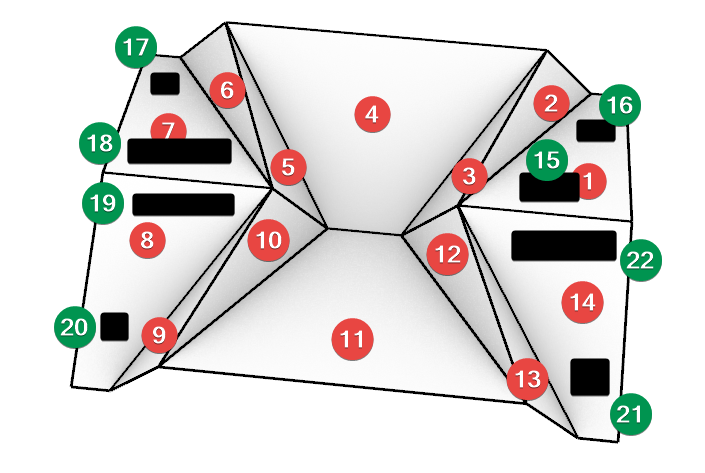

In [ ]:
# %matplotlib widget
import k3d
import matplotlib.pylab as plt
import numpy as np
from wb_cell_scan_to_creases import WBCellScanToCreases

In [ ]:
analysis = WBCellScanToCreases(file_path='wb9_facets_points.obj', flip_vertically=True)

## Read the scanned files for individual cells
The individual variables are lists of facets with $i$ nodes that can vary per facet and spatial coordinates

In [ ]:
plot = k3d.plot(name='Nodes')
analysis.plot_groups_of_points(plot, analysis.wb_scan_X_Fia)
plot.display()

## Derive the facet planes
For each facet plane, identify the coefficients $a,b,c,d$ defining the equation of a plane in the form
$$
 a x + b y + c z + d = 0
$$
The result are the attributes `planes_Fi`, and `cetroids_Fa`

In [ ]:
analysis.planes_Fi;
analysis.centroids_Fa;

In [ ]:
plot = k3d.plot(name='Vectors')
analysis.plot_groups_of_points(plot, analysis.wb_scan_X_Fia)
analysis.plot_planes(plot)
plot.display()

## Intersection lines

Find all intersection lines between all facets


In [ ]:
plot = k3d.plot(name='Vectors')
#analysis.plot_groups_of_points(plot, analysis.wb_scan_X_Fia)
#analysis.plot_points(plot, analysis.centroids_Fa, point_size=20, color=0x000000, plot_numbers=False)
analysis.plot_points(plot, analysis.isc_points_Li, point_size=20, color=0x0000ff, plot_numbers=False)
analysis.plot_intersection_lines(plot)
plot.display()

## Intersection nodes

Specify indexes of lines for which a common intersection point is to be identified. 

In [ ]:
plot = k3d.plot(name='Vectors')
analysis.plot_points(plot, analysis.icrease_nodes_X_Na, point_size=5, 
                     color=0x0000ff, plot_numbers=True)
analysis.plot_intersection_lines(plot, isc_vec_scale=300, 
           color=0x000000, plot_labels=True)
plot.display()

## Crease nodes and lines identified

In [ ]:
plot = k3d.plot(name='Vectors')
analysis.plot_icrease_nodes(plot, node_numbers=True)
analysis.plot_icrease_lines(plot, line_numbers=True)
analysis.plot_O_basis(plot)
plot.display()

# Transform the cell to the local coordinates

In [ ]:
plot = k3d.plot(name='Vectors')
analysis.plot_O_icrease_nodes(plot, node_numbers=True)
analysis.plot_O_icrease_lines(plot, line_numbers=True)
plot.display()

## Derive the boundary nodes

The variables starting with O_ are related to the origin base
The crease nodes derived using intersection of the planes are 
denoted as `icrease_nodes`. the boundary nodes are denoted as `bcrease_nodes`.
The connecting lines are analogously `icrease_lines` and `bcrease_lines`.
They are stacked in `crease_nodes`` and `crease_lines``

In [ ]:
self = analysis
length_valley = np.average(self.lengths_icrease_lines_L[[5,9,11,7]])
valley_Ca = self.O_icrease_nodes_X_Na[[2,3,3,2]]
vec_valley_Ca = self.O_isc_vectors_Li[[0,5,7,12]]
valley_node_X_Ca = valley_Ca + vec_valley_Ca * length_valley

length_mountain = np.average(self.lengths_icrease_lines_L[[13,14]])
mountain_Ca = self.O_icrease_nodes_X_Na[[0,1]]
vec_mountain_Ca = self.O_isc_vectors_Li[[13,6]]
mountain_node_X_Ca = mountain_Ca + vec_mountain_Ca * length_mountain / 2

corner_node_X_Ca = np.copy(valley_node_X_Ca)
corner_node_X_Ca[:,0] = mountain_node_X_Ca[[0,1,1,0],0] 

O_bcrease_nodes_X_Ca = np.vstack([valley_node_X_Ca, mountain_node_X_Ca, corner_node_X_Ca])

In [ ]:
vec_valley_Ca

In [ ]:
plot = k3d.plot(name='Vectors')
analysis.plot_O_crease_lines(plot)
#analysis.plot_O_crease_lines(plot, line_numbers=False)
analysis.plot_points(plot, analysis.O_crease_nodes_X_Na, point_size=40, color=0x007777, plot_numbers=True)
plot.display()

## Quantify the thickness of the contact facets

In [ ]:
analysis.O_thickness_Fi

In [ ]:
plot = k3d.plot(name='Vectors')
analysis.plot_points(plot, analysis.O_crease_nodes_X_Na, plot_numbers=False)
analysis.plot_O_crease_lines(plot, line_numbers=False)
analysis.plot_points(plot, analysis.O_centroids_Fa[[14,17,18,21]], point_size=30, plot_numbers=True)
plot.display()

# Quantify the geometrical cell differences

In [ ]:
analysis.sym_crease_length_diff_S

## Determination of the folding angle $\gamma$ from 3d scan

In [ ]:
analysis.sym_crease_angles_S

## Compare the geometry of all cells

In [ ]:
# files = ('wb5_facets_points.obj', 'wb7_facets_points.obj', 'wb8_facets_points.obj')
files = (#'wb7_facets_points.obj', 
         #'wb8_facets_points.obj', 
         'wb9_facets_points.obj',
         'wb10_facets_points.obj', 
#        'wb11_facets_points.obj'
)
flips = [
#     False, 
#     False, 
    True, 
    True, 
#    False
    ]
analyses = [ WBCellScanToCreases(file_path=file, flip_vertically=flip) 
            for flip, file in zip(flips, files)]

In [ ]:
sym_crease_length_diffs_WS = np.array([analysis.sym_crease_length_diff_S 
                                       for analysis in analyses ])
sym_crease_length_diffs_WS

In [ ]:
sym_crease_angles_WS = np.array([analysis.sym_crease_angles_S 
                                       for analysis in analyses ])

sym_crease_angles_WS

# Evaluate the differences between individual cells

- quantify the distance between the intersection points
- quantify the difference between normals that should be compatible

In [ ]:
plot = k3d.plot(name='Vectors')
colors = [0xff0000, 0x00ff00, 0x0000ff, 0xffff00, 0xff00ff, 0x00ffff]

for i, analysis in enumerate(analyses):
    color = colors[i % len(colors)]
    analysis.plot_O_crease_lines(plot, color=color)
#    analysis.plot_points(plot, analysis.O_centroids_Fa[[14,17,18,21]], point_size=30, plot_numbers=True)

plot.display()

In [ ]:
import k3d
import numpy as np

# Initialize the plot
plot = k3d.plot()

# Define the points
points = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Loop over the points and add them to the plot
for i in range(3):
    point = k3d.points(points[i], point_size=0.2, color=0xff0000)
    plot += point

# Display the plot
plot.display()